# Your Tasks

## Mental Disorder Dataset

Mental Health is an important issue. It must be taken seriously and treated appropriately. Using historical data collected from people diagnosed with Mania Bipolar Disorder (Bipolar Type-1), Depressive Bipolar Disorder (Bipolar Type-2), Major Depressive Disorder, and Normal Individuals, your task is to build a model that can detect the type of mental disorder. The Normal category refers to the individuals who may have minor mental problems, but they differ from those suffering from Major Depressive Disorder and Bipolar Disorder.

Your model will be used in as a tool that will help psychiatrists in their decision making process.

A collection of 120 Psychology Patients with 17 Essential Symptoms is prepared.
The dataset contains the 17 essential symptoms psychiatrists use to diagnose the described disorders. The behavioral symptoms are considered the levels of patients Sadness, Exhaustness, Euphoric, Sleep disorder, Mood swings, Suicidal thoughts, Anorexia, Anxiety, Try-explaining, Nervous breakdown, Ignore & Move-on, Admitting mistakes, Overthinking, Aggressive response, Optimism, Sexual activity, and Concentration.


### Install and import dependencies

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Download dataset

In [ ]:
dataframe = pd.read_csv("Mental-Health.csv")

In [ ]:
dataframe.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


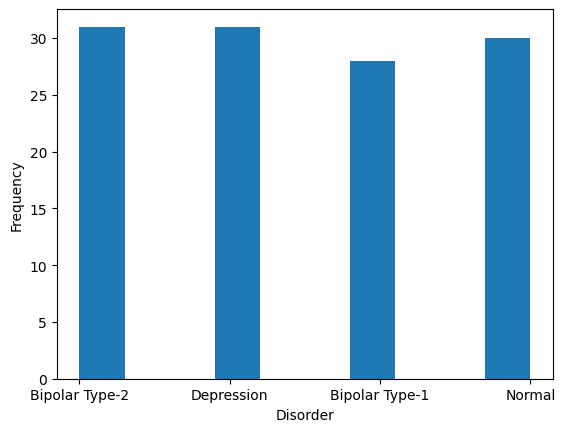

In [ ]:
plt.hist(dataframe["Expert Diagnose"])
plt.xlabel("Disorder")
plt.ylabel("Frequency")

plt.show()

In [ ]:
#Check to see if there is balance in Expert Diagnose
#There is a small unbalance with Bipolar Type-1
dataframe.describe()
dataframe["Expert Diagnose"].value_counts()

Bipolar Type-2    31
Depression        31
Normal            30
Bipolar Type-1    28
Name: Expert Diagnose, dtype: int64

# Data Cleaning

In [ ]:
for column in dataframe.columns:
  print(f"{column}")
  print(f"{dataframe[column].value_counts()}\n")

In [ ]:
#Found an outlier in suicidal thoughts in Paitent 1
dataframe['Suicidal thoughts'] = dataframe['Suicidal thoughts'].replace('YES ', 'YES') #Removes space

In [ ]:
dataframe = dataframe.drop('Patient Number', axis = 1) #we dropped patient number because it is irrelevant for training our model, it just indicates that there are unique entries

# Splitting into Train and Test dataset

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

target = dataframe["Expert Diagnose"]
data = dataframe.drop("Expert Diagnose", axis = 1)

sampler = RandomUnderSampler(random_state=0)

#X_under, y_under = sampler.fit_resample(data, target) : we found that undersampling introduces overfitting, the dataset is relatively balanced already
#data = X_under
#target = y_under testing

target.value_counts()

Bipolar Type-2    31
Depression        31
Normal            30
Bipolar Type-1    28
Name: Expert Diagnose, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

y_train.value_counts()

Bipolar Type-2    26
Bipolar Type-1    24
Normal            23
Depression        23
Name: Expert Diagnose, dtype: int64

# Data Preperation


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

cat_attribs = ["Sadness", "Euphoric", "Exhausted", "Sleep dissorder", "Mood Swing", "Suicidal thoughts", "Anorxia",
                            "Authority Respect", "Try-Explanation", "Aggressive Response", "Ignore & Move-On",
                            "Nervous Break-down", "Admit Mistakes", "Overthinking", "Sexual Activity",
                            "Concentration", "Optimisim"]

cat_pipeline = make_pipeline(OneHotEncoder(), StandardScaler(with_mean=False))

full_pipeline = ColumnTransformer([("cat", cat_pipeline, cat_attribs)])

In [ ]:
X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)

# Select and Train a Model

In [ ]:
#importing models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
#KNeighbours
clf_1 = KNeighborsClassifier(n_neighbors=3)
clf_1.fit(X_train_prepared, y_train)
clf_1_scores = cross_val_score(clf_1, X_train_prepared, y_train, cv=10)
pd.Series(clf_1_scores).describe()

count    10.000000
mean      0.698889
std       0.121879
min       0.500000
25%       0.616667
50%       0.700000
75%       0.794444
max       0.888889
dtype: float64

In [ ]:
#Decision Tree
clf_2 = DecisionTreeClassifier(random_state=42)
clf_2.fit(X_train_prepared, y_train)
clf_2_scores = cross_val_score(clf_2, X_train_prepared, y_train, cv=10)
pd.Series(clf_2_scores).describe()

count    10.000000
mean      0.731111
std       0.153942
min       0.500000
25%       0.625000
50%       0.738889
75%       0.794444
max       1.000000
dtype: float64

In [ ]:
#Random Forest
clf_3 = RandomForestClassifier(random_state=42)
clf_3.fit(X_train_prepared, y_train)
clf_3_scores = cross_val_score(clf_3, X_train_prepared, y_train, cv=10)
pd.Series(clf_3_scores).describe()

count    10.000000
mean      0.823333
std       0.067779
min       0.700000
25%       0.783333
50%       0.800000
75%       0.888889
max       0.900000
dtype: float64

In [ ]:
#Logistic Regression
clf_4 = LogisticRegression(random_state=42)
clf_4.fit(X_train_prepared, y_train)
clf_4_scores = cross_val_score(clf_4, X_train_prepared, y_train, cv=10)
pd.Series(clf_4_scores).describe()

count    10.000000
mean      0.855556
std       0.135578
min       0.600000
25%       0.783333
50%       0.888889
75%       0.975000
max       1.000000
dtype: float64

In [ ]:
#Support Vector Machine - Classification
clf_5 = svm.SVC(random_state=42)
clf_5.fit(X_train_prepared, y_train)
clf_5_scores = cross_val_score(clf_5, X_train_prepared, y_train, cv=10)
pd.Series(clf_5_scores).describe()

count    10.000000
mean      0.834444
std       0.178198
min       0.500000
25%       0.800000
50%       0.894444
75%       0.975000
max       1.000000
dtype: float64

# Confusion Matrix

When we undersampled our data, based on the confusion matrix, the SVC model performed the best. However at the end of fine tuning, overfitting was seen. The results that you see now does not include undersampling.

**Model SVC**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_predict = clf_5.predict(X_test_prepared)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[3 1 0 0]
 [0 5 0 0]
 [1 0 7 0]
 [1 0 2 4]]
                precision    recall  f1-score   support

Bipolar Type-1       0.60      0.75      0.67         4
Bipolar Type-2       0.83      1.00      0.91         5
    Depression       0.78      0.88      0.82         8
        Normal       1.00      0.57      0.73         7

      accuracy                           0.79        24
     macro avg       0.80      0.80      0.78        24
  weighted avg       0.82      0.79      0.79        24



**LogisticRegression**


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_predict = clf_4.predict(X_test_prepared)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[3 1 0 0]
 [0 5 0 0]
 [0 0 8 0]
 [0 0 2 5]]
                precision    recall  f1-score   support

Bipolar Type-1       1.00      0.75      0.86         4
Bipolar Type-2       0.83      1.00      0.91         5
    Depression       0.80      1.00      0.89         8
        Normal       1.00      0.71      0.83         7

      accuracy                           0.88        24
     macro avg       0.91      0.87      0.87        24
  weighted avg       0.90      0.88      0.87        24



**RandomForest Classifier**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_predict = clf_3.predict(X_test_prepared)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[2 1 0 1]
 [0 5 0 0]
 [0 0 8 0]
 [1 0 2 4]]
                precision    recall  f1-score   support

Bipolar Type-1       0.67      0.50      0.57         4
Bipolar Type-2       0.83      1.00      0.91         5
    Depression       0.80      1.00      0.89         8
        Normal       0.80      0.57      0.67         7

      accuracy                           0.79        24
     macro avg       0.77      0.77      0.76        24
  weighted avg       0.78      0.79      0.78        24



**Decision Tree Classifier**



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_predict = clf_2.predict(X_test_prepared)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[2 1 0 1]
 [1 4 0 0]
 [0 0 6 2]
 [0 0 0 7]]
                precision    recall  f1-score   support

Bipolar Type-1       0.67      0.50      0.57         4
Bipolar Type-2       0.80      0.80      0.80         5
    Depression       1.00      0.75      0.86         8
        Normal       0.70      1.00      0.82         7

      accuracy                           0.79        24
     macro avg       0.79      0.76      0.76        24
  weighted avg       0.82      0.79      0.79        24



**KNeighbourClassifier**



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_predict = clf_1.predict(X_test_prepared)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[2 1 0 1]
 [0 4 1 0]
 [1 1 6 0]
 [0 0 2 5]]
                precision    recall  f1-score   support

Bipolar Type-1       0.67      0.50      0.57         4
Bipolar Type-2       0.67      0.80      0.73         5
    Depression       0.67      0.75      0.71         8
        Normal       0.83      0.71      0.77         7

      accuracy                           0.71        24
     macro avg       0.71      0.69      0.69        24
  weighted avg       0.72      0.71      0.71        24



**CONCLUSION**

Based on this so far looks like best model is Logistic Regression.



# Fine-Tuning & Validation - Logistic Regression, no undersampling - metrics remained the same.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300],
    'class_weight': [None, 'balanced'],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'warm_start': [True, False]
}

grid = GridSearchCV(clf_4, param_grid, refit = True, verbose = 3)

grid.fit(X_train_prepared, y_train)

In [ ]:
print(grid.best_params_, grid.best_score_)

{'C': 10, 'class_weight': None, 'max_iter': 100, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'saga', 'warm_start': True} 0.8868421052631579


In [ ]:
clf_final = LogisticRegression(C=10, class_weight=None, max_iter=100, multi_class='auto', penalty='l1', solver='saga', warm_start=True, random_state=42)
clf_final.fit(X_train_prepared, y_train)
clf_final_scores = cross_val_score(clf_final, X_train_prepared, y_train, cv=10)
pd.Series(clf_final_scores).describe()

In [ ]:
y_predict = clf_final.predict(X_test_prepared)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[3 1 0 0]
 [0 5 0 0]
 [0 0 8 0]
 [0 0 2 5]]
                precision    recall  f1-score   support

Bipolar Type-1       1.00      0.75      0.86         4
Bipolar Type-2       0.83      1.00      0.91         5
    Depression       0.80      1.00      0.89         8
        Normal       1.00      0.71      0.83         7

      accuracy                           0.88        24
     macro avg       0.91      0.87      0.87        24
  weighted avg       0.90      0.88      0.87        24



# Fine-Tuning & Validation - SVC chosen with undersampling, but overfitting was seen.

In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {'C': [0.1, 1, 10, 100, 1000],
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            'kernel': ['rbf', 'linear'],
            'degree': [2, 3, 4],
            'coef0': [0.0, 0.1, 0.5]}

grid = GridSearchCV(clf_5, param_grid, refit = True, verbose = 3)

grid.fit(X_train_prepared, y_train)

In [ ]:
print(grid.best_params_, grid.best_score_) #Best Parameter, #the parameters in the output would be thrown inside the SVM model, this SHOULD give us a better metric for our confusion matrix.

{'C': 10, 'coef0': 0.0, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'} 0.8549019607843137


In [ ]:
clf_final = svm.SVC(C=10, coef0=0.0, degree=2, kernel='rbf', gamma=0.01, random_state=42)
clf_final.fit(X_train_prepared, y_train)
clf_final_scores = cross_val_score(clf_final, X_train_prepared, y_train, cv=10)
pd.Series(clf_final_scores).describe()

count    10.000000
mean      0.876389
std       0.081893
min       0.666667
25%       0.888889
50%       0.888889
75%       0.888889
max       1.000000
dtype: float64

In [ ]:
y_predict = clf_final.predict(X_test_prepared)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) # the model performed worse????? Overfitting? Small data set of 120 patients? Undersampling unnecessary?

[[3 2 0 2]
 [0 8 0 0]
 [0 0 4 1]
 [0 0 0 3]]
                precision    recall  f1-score   support

Bipolar Type-1       1.00      0.43      0.60         7
Bipolar Type-2       0.80      1.00      0.89         8
    Depression       1.00      0.80      0.89         5
        Normal       0.50      1.00      0.67         3

      accuracy                           0.78        23
     macro avg       0.82      0.81      0.76        23
  weighted avg       0.87      0.78      0.77        23



## Wine Quality dataset

The [Wine Quality](https://archive.ics.uci.edu/ml/datasets/wine+quality) dataset consists of a set of 11 input parameters (acidity, sugar content, alcohol level, etc) and a single output ("quality" as assessed by expert tasters). The white wine dataset, with a total of 4898 samples, is selected for this problem.

The wine quality dataset is larger than the mental health disrder datasets, there are a number of challenges to overcome:
- Not all inputs are necessarily relevant, and some may be correlated. Part of your experimentation should be determining which inputs to use.
- The dataset is not pre-split into test/train/validation sets.
- The input parameters are not on the same scale, so they require preprocessing.
- The output can be treated as either a regression problem (predict a continuous value from 0 to 9) or as a classification problem.
- The output classes are unbalanced. You will have to address this through appropriate choice of loss metric or resampling.

Train a regression model OR a 3-class classifier (low, medium, high quality). To train a 3-class classifier, you must re-label the data. You may choose the cut-off points for each class.

In [ ]:
white_wine_csv = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
wine_data = pd.read_csv(white_wine_csv, sep=';')

# Inspect the dataset
wine_data.info()
wine_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
wine_data.drop_duplicates() #drop duplicates from the dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Note that the wine quality dataset is **unbalanced**, with many more samples in the "medium" quality categories than at the extremes.

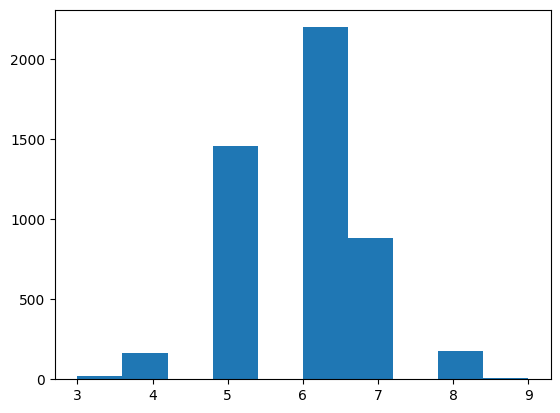

In [ ]:
plt.hist(wine_data['quality'], bins=10)
plt.show()

In [ ]:
corr_matrix = wine_data.corr()
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [ ]:
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

At this part, we decided that looking at quality was not enough, so we looked at other features that improved performance for the model and see what was correleated to them.

In [ ]:
corr_matrix["free sulfur dioxide"].sort_values(ascending=False)

free sulfur dioxide     1.000000
total sulfur dioxide    0.615501
residual sugar          0.299098
density                 0.294210
chlorides               0.101392
citric acid             0.094077
sulphates               0.059217
quality                 0.008158
pH                     -0.000618
fixed acidity          -0.049396
volatile acidity       -0.097012
alcohol                -0.250104
Name: free sulfur dioxide, dtype: float64

In [ ]:
corr_matrix["residual sugar"].sort_values(ascending=False)

residual sugar          1.000000
density                 0.838966
total sulfur dioxide    0.401439
free sulfur dioxide     0.299098
citric acid             0.094212
fixed acidity           0.089021
chlorides               0.088685
volatile acidity        0.064286
sulphates              -0.026664
quality                -0.097577
pH                     -0.194133
alcohol                -0.450631
Name: residual sugar, dtype: float64

In [ ]:
corr_matrix["alcohol"].sort_values(ascending=False)

alcohol                 1.000000
quality                 0.435575
pH                      0.121432
volatile acidity        0.067718
sulphates              -0.017433
citric acid            -0.075729
fixed acidity          -0.120881
free sulfur dioxide    -0.250104
chlorides              -0.360189
total sulfur dioxide   -0.448892
residual sugar         -0.450631
density                -0.780138
Name: alcohol, dtype: float64

In [ ]:
corr_matrix["pH"].sort_values(ascending=False)

pH                      1.000000
sulphates               0.155951
alcohol                 0.121432
quality                 0.099427
total sulfur dioxide    0.002321
free sulfur dioxide    -0.000618
volatile acidity       -0.031915
chlorides              -0.090439
density                -0.093591
citric acid            -0.163748
residual sugar         -0.194133
fixed acidity          -0.425858
Name: pH, dtype: float64

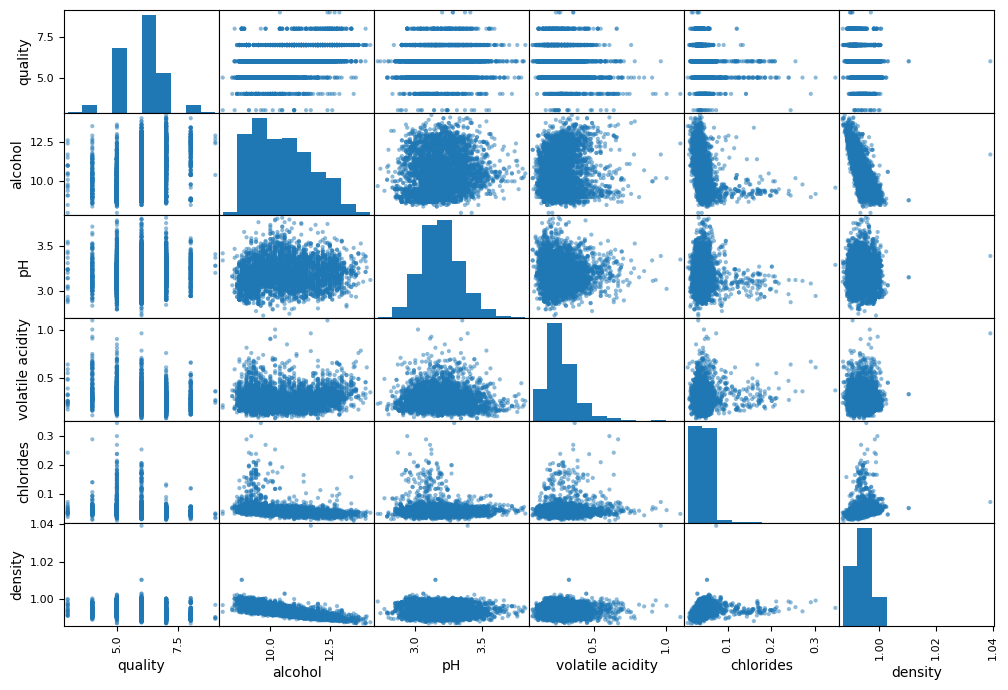

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["quality", "alcohol", "pH", "volatile acidity", "chlorides", "density"] #our chosen features to test
scatter_matrix(wine_data[attributes], figsize=(12, 8))
plt.show()

# Data Preperation

In [ ]:
#at this part we will drop certain columns(attributes) and test different combinations so we can see if we get a better output
wine_data.drop(["volatile acidity", "citric acid", "total sulfur dioxide", "fixed acidity"], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
strat_train_set, strat_test_set = train_test_split(wine_data, test_size=0.2, stratify=wine_data["quality"], random_state=42)
wine = strat_train_set.copy()

In [ ]:
wine = strat_train_set.drop("quality", axis=1) # we chosen this to be our target value
wine_labels = strat_train_set["quality"].copy() #ensure that you do not use test data when replacing missing values

wine_test = strat_test_set.drop("quality", axis=1)
wine_test_labels = strat_test_set["quality"].copy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

#Originally we included all features to get an estimate of how the model performs, we then end up choosing the below features as it performed better.
# num_attribs = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar",
#                "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH"
#                , "sulphates", "alcohol"]

num_attribs = ["alcohol", "density","free sulfur dioxide", "residual sugar"
              , "sulphates" ,"pH", "chlorides"]

num_pipeline = make_pipeline(
    StandardScaler())

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs)
])

wine_prepared = full_pipeline.fit_transform(wine)
wine__test_prepared = full_pipeline.fit_transform(wine_test)



# Select and Train Model

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(wine_prepared, wine_labels)

tree_rmses = -cross_val_score(tree_reg, wine_prepared, wine_labels, scoring="neg_root_mean_squared_error", cv=10)
pd.Series(tree_rmses).describe()

count    10.000000
mean      0.888491
std       0.050319
min       0.843207
25%       0.850312
50%       0.871866
75%       0.910781
max       0.988454
dtype: float64

**Linear Regression**




In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression() #choosing linear regression model
lin_reg.fit(wine_prepared, wine_labels) #train model using features(cleaned and prepared) and target value

lin_rmses = -cross_val_score(lin_reg, wine_prepared, wine_labels, scoring="neg_root_mean_squared_error", cv=10) #instance, feature data, target label
pd.Series(lin_rmses).describe()

count    10.000000
mean      0.775257
std       0.026685
min       0.730691
25%       0.761406
50%       0.779718
75%       0.790455
max       0.810460
dtype: float64

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(wine_prepared, wine_labels)

forest_rmses = -cross_val_score(forest_reg, wine_prepared, wine_labels, scoring="neg_root_mean_squared_error", cv=10) #Gives us error rates. Closer to 0 better
pd.Series(forest_rmses).describe()

count    10.000000
mean      0.648247
std       0.023178
min       0.618183
25%       0.624028
50%       0.653222
75%       0.669669
max       0.675007
dtype: float64

**PLSRegression**

In [ ]:
from sklearn.cross_decomposition import PLSRegression

pls_reg = PLSRegression(n_components=2)
pls_reg.fit(wine_prepared, wine_labels)

pls_rmses = -cross_val_score(pls_reg, wine_prepared, wine_labels, scoring="neg_root_mean_squared_error", cv=10)
pd.Series(pls_rmses).describe()

count    10.000000
mean      0.783293
std       0.027832
min       0.739457
25%       0.765934
50%       0.784964
75%       0.801717
max       0.827982
dtype: float64

Based on our current result, Random Forest is our chosen models.

# Fine Tune - Wine Model

In [ ]:
from sklearn.model_selection import GridSearchCV

#we chose these hyperparameters to tune the model for RandomForest
param_grid_wine = {
    'n_estimators': [100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_wine = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_wine, scoring="neg_root_mean_squared_error", refit = True, verbose = 3)

grid_wine.fit(wine_prepared, wine_labels)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.660 total time=   1.0s
[CV 2/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.658 total time=   1.1s
[CV 3/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.662 total time=   1.1s
[CV 4/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.682 total time=   1.3s
[CV 5/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.645 total time=   1.0s
[CV 1/5] END min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-0.664 total time=   1.0s
[CV 2/5] END min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-0.663 total time=   1.0s
[CV 3/5] END min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-0.663 total time=   1.6s
[CV 4/5] END min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-0.681 total time=   

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100]},
             scoring='neg_root_mean_squared_error', verbose=3)

In [ ]:
print(grid_wine.best_params_, grid_wine.best_score_) #based on our scoring, we need to experiment with different columns
# old -0.6338439911921175 - with all features included
# new -0.6613816497385743 - with selected features

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100} -0.6613816497385743


# Validate Wine Model

In [ ]:
final_model = grid_wine.best_estimator_

feature_importances = final_model.feature_importances_
feature_importances.round(2)

final_predictions = final_model.predict(wine__test_prepared)

final_rmse = mean_squared_error(wine_test_labels,final_predictions, squared=False)
print(final_rmse)

0.6722524580445495
